In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
MM3, E3 = np.loadtxt("ManyBodyM1_2M2_4Cutoff3.dat",usecols=(0,1),unpack=True)
MM4, E4 = np.loadtxt("ManyBodyM1_2M2_-2Cutoff3.dat",usecols=(0,1),unpack=True)
MM1, E1 = np.loadtxt("RelativeESU30M-2trivial.dat",usecols=(0,1),unpack=True)
MM2, E2 = np.loadtxt("RelativeESU30m2topological.dat",usecols=(0,1),unpack=True)
toldegen = 1e-4
def degeneracyCount(MMi,Ei):
    inds11 = np.argsort(Ei)
    MM1re = [MMi[inds] for inds in inds11]
    E1re = [Ei[inds] for inds in inds11]
    degen1 = [1 for i in range(len(E1re))]
    MM1re2 = [MM1re[0]]
    E1re2 = [E1re[0]]
    degen1re2 = [degen1[0]]
    k = 0
    for i in range(1,len(E1re)):
        if (abs(E1re[i]-E1re[i-1]) < toldegen) & (abs(MM1re[i]-MM1re[i-1])<1e-8):
            degen1re2[k] += 1
        else:
            E1re2.append(E1re[i])
            MM1re2.append(MM1re[i])
            degen1re2.append(degen1[i])
            k += 1
    return E1re2, MM1re2, degen1re2
E1, MM1, degen1 = degeneracyCount(MM1,E1)
E2, MM2, degen2 = degeneracyCount(MM2,E2)
E3, MM3, degen3 = degeneracyCount(MM3,E3)
E4, MM4, degen4 = degeneracyCount(MM4,E4)

In [52]:
MM2[6]

1.5

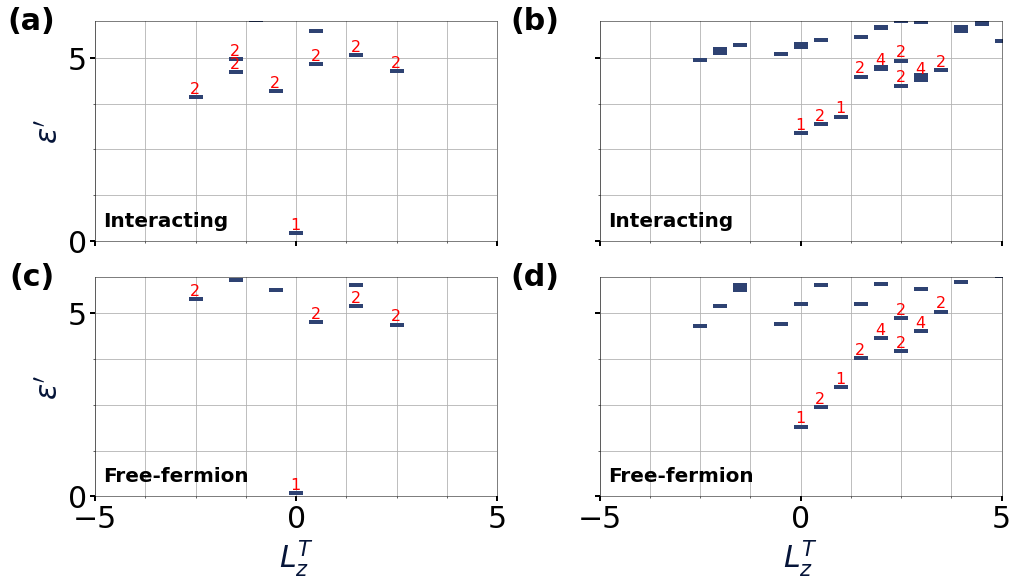

In [93]:
SMALL_SIZE = 30
MEDIUM_SIZE = 30
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', axisbelow=True)

fig,[[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,sharex=True,sharey=True,figsize=(14,8),constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=2 / 72, h_pad=2 / 72, hspace=0, wspace=0)
ax = fig.gca()
# Major ticks every 20, minor ticks every 5
xmajor_ticks = np.arange(-5, 10, 5)
xminor_ticks = np.arange(-5, 10, 1.25)
ymajor_ticks = np.arange(0, 15, 5)
yminor_ticks = np.arange(0, 15, 1.25)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)

'''Plot 1'''
ax1.grid(which='both')
ax1.yaxis.set_tick_params(width=2, length=5)
ax1.xaxis.set_tick_params(width=2, length=5)
for axes in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axes].set_linewidth(0.5)

# left, bottom, width, height = [0.2, 0.76, 0.6, 0.6]
# ax2 = fig.add_axes([left, bottom, width, height])
# ax2.imshow(im)
# ax2.axis("off")
# ax2.scatter(MM,EE,s=1,color="green")
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_xlabel("$m$")
# ax2.set_ylabel("$E$")

ax1.scatter(MM1,E1,s=220,color="#2E4272",marker="_",linewidth=4)
# ax1.set_xlabel("$L_z^T$",color="#061539")
ax1.set_ylabel("$\epsilon'$",color="#061539")
ax1.text(-6,6.4,"(a)",fontsize=30,fontweight="bold",va="top",ha="right")

ax1.text(-4.8,0.4,"Interacting",fontsize=20,fontweight="bold")

for i in range(len(degen1)):
    if E1[i] < 5.5:
        ax1.text(MM1[i]-0.14,E1[i]+0.1,str(degen1[i]),fontsize=16,color="r")

'''Plot 2'''
ax2.grid(which='both')
ax2.yaxis.set_tick_params(width=2, length=5)
ax2.xaxis.set_tick_params(width=2, length=5)
for axes in ['top', 'bottom', 'left', 'right']:
    ax2.spines[axes].set_linewidth(0.5)

# left, bottom, width, height = [0.2, 0.76, 0.6, 0.6]
# ax2 = fig.add_axes([left, bottom, width, height])
# ax2.imshow(im)
# ax2.axis("off")
# ax2.scatter(MM,EE,s=1,color="green")
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_xlabel("$m$")
# ax2.set_ylabel("$E$")

ax2.scatter(MM2,E2,s=220,color="#2E4272",marker="_",linewidth=4)
# ax2.set_xlabel("$L_z^T$",color="#061539")
# ax2.set_ylabel("$\epsilon'$",color="#061539")
ax2.text(-6,6.4,"(b)",fontsize=30,fontweight="bold",va="top",ha="right")

ax2.text(-4.8,0.4,"Interacting",fontsize=20,fontweight="bold")

ax2.text(MM2[0]-0.14,E2[0]+0.1,str(degen2[0]),fontsize=16,color="r")
ax2.text(MM2[1]-0.14,E2[1]+0.1,str(degen2[1]),fontsize=16,color="r")
ax2.text(MM2[2]-0.14,E2[2]+0.1,str(degen2[2]),fontsize=16,color="r")
ax2.text(MM2[3]-0.14,E2[3]+0.1,str(degen2[3]),fontsize=16,color="r")
# ax2.text(MM2[4]-0.14,E2[4]-0.44,str(degen2[4]),fontsize=16,color="r")
# ax2.text(MM2[5]-0.14,E2[5]+0.2,str(degen2[5]),fontsize=16,color="r")
ax2.text(MM2[5]-0.14,E2[5]+0.1,str(4),fontsize=16,color="r")
ax2.text(MM2[6]-0.14,E2[6]+0.1,str(degen2[6]),fontsize=16,color="r")
# ax2.text(MM2[7]-0.14,E2[7]+0.56,str(degen2[7]),fontsize=16,color="r")
ax2.text(MM2[8]-0.14,E2[8]+0.1,str(degen2[8]),fontsize=16,color="r")
# ax2.text(MM2[9]-0.14,E2[9]-0.44,str(degen2[9]),fontsize=16,color="r")
# ax2.text(MM2[10]-0.14,E2[10]+0.1,str(degen2[10]),fontsize=16,color="r")
ax2.text(MM2[10]-0.14,E2[10]+0.1,str(4),fontsize=16,color="r")
# ax2.text(MM2[11]-0.14,E2[11]+0.48,str(degen2[11]),fontsize=16,color="r")
ax2.text(MM2[12]-0.14,E2[12]+0.1,str(degen2[12]),fontsize=16,color="r")
# ax2.text(MM2[13]-0.14,E2[13]+0.1,str(degen2[13]),fontsize=16,color="r")

'''Plot 3'''
ax3.grid(which='both')
ax3.yaxis.set_tick_params(width=2, length=5)
ax3.xaxis.set_tick_params(width=2, length=5)
for axes in ['top', 'bottom', 'left', 'right']:
    ax3.spines[axes].set_linewidth(0.5)

# left, bottom, width, height = [0.2, 0.76, 0.6, 0.6]
# ax2 = fig.add_axes([left, bottom, width, height])
# ax2.imshow(im)
# ax2.axis("off")
# ax2.scatter(MM,EE,s=1,color="green")
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_xlabel("$m$")
# ax2.set_ylabel("$E$")

ax3.scatter(MM3,E3,s=220,color="#2E4272",marker="_",linewidth=4)
ax3.set_xlabel("$L_z^T$",color="#061539")
ax3.set_ylabel("$\epsilon'$",color="#061539")
ax3.text(-6,6.4,"(c)",fontsize=30,fontweight="bold",va="top",ha="right")

ax3.text(-4.8,0.4,"Free-fermion",fontsize=20,fontweight="bold")

for i in range(len(degen3)):
    if E3[i] < 5.52:
        ax3.text(MM3[i]-0.14,E3[i]+0.1,str(degen3[i]),fontsize=16,color="r")

'''Plot 4'''
ax4.grid(which='both')
ax4.yaxis.set_tick_params(width=2, length=5)
ax4.xaxis.set_tick_params(width=2, length=5)
for axes in ['top', 'bottom', 'left', 'right']:
    ax4.spines[axes].set_linewidth(0.5)

# left, bottom, width, height = [0.2, 0.76, 0.6, 0.6]
# ax2 = fig.add_axes([left, bottom, width, height])
# ax2.imshow(im)
# ax2.axis("off")
# ax2.scatter(MM,EE,s=1,color="green")
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_xlabel("$m$")
# ax2.set_ylabel("$E$")

ax4.scatter(MM4,E4,s=220,color="#2E4272",marker="_",linewidth=4)
ax4.set_xlabel("$L_z^T$",color="#061539")
# ax4.set_ylabel("$\epsilon'$",color="#061539")
ax4.text(-6,6.4,"(d)",fontsize=30,fontweight="bold",va="top",ha="right")

ax4.text(-4.8,0.4,"Free-fermion",fontsize=20,fontweight="bold")

for i in range(len(degen3)):
    if E4[i] < 5.52:
        if MM4[i] > - 0.2:
            ax4.text(MM4[i]-0.14,E4[i]+0.1,str(degen4[i]),fontsize=16,color="r")

# '''Inset of the opposite mass case'''
# x1, x2, y1, y2 = -2.5,2.5,0.25,0.75
# axins = ax2.inset_axes([0.6, 0.36, 0.38, 0.5],frame_on=True)
# axins.grid()
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# axins.set_xticklabels([])
# axins.set_yticklabels([])
# axins.scatter(MM2in,E2in)
# ax2.indicate_inset_zoom(axins, edgecolor="black")
# axins.text(0.2,0.64,"$\delta_S = 4$",size=20,color="red")

# '''Images'''
# left, bottom, width, height = [0.10, 0.92, 0.4, 0.4]
# ax1im = fig.add_axes([left, bottom, width, height])
# ax1im.imshow(im1)
# ax1im.axis("off")

# left, bottom, width, height = [0.56, 0.92, 0.4, 0.4]
# ax2im = fig.add_axes([left, bottom, width, height])
# ax2im.imshow(im2)
# ax2im.axis("off")

# left, bottom, width, height = [0.10, 0.34, 0.4, 0.4]
# ax3im = fig.add_axes([left, bottom, width, height])
# ax3im.imshow(im3)
# ax3im.axis("off")

# left, bottom, width, height = [0.56, 0.34, 0.4, 0.4]
# ax4im = fig.add_axes([left, bottom, width, height])
# ax4im.imshow(im4)
# ax4im.axis("off")








# plt.xlabel("m",color="#061539")
plt.xlim(-5,5)
plt.ylim(0,6)
plt.savefig("InteractingRelESPlotsCutoff3.pdf",bbox_inches="tight",pad_inches=0.4,dpi=300)
plt.show()



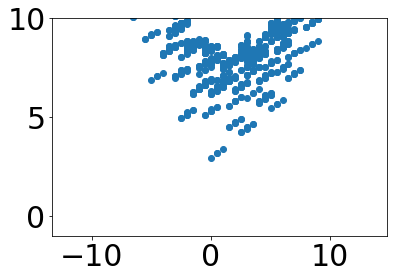

In [13]:
plt.figure(1)
plt.ylim(-1,10)
plt.scatter(MM2,E2)